
# Linear Regression Model


We will try to predict housing prices for regions in the USA. Regression model allows to put in a few features of a house and returns back an estimate of what price the house can be sold for.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [75]:
house_data = pd.read_csv('housing.csv')

In [76]:
house_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [77]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [78]:
house_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [79]:
house_data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# EDA (Exploratory Data Analysis)

<Figure size 1200x800 with 0 Axes>

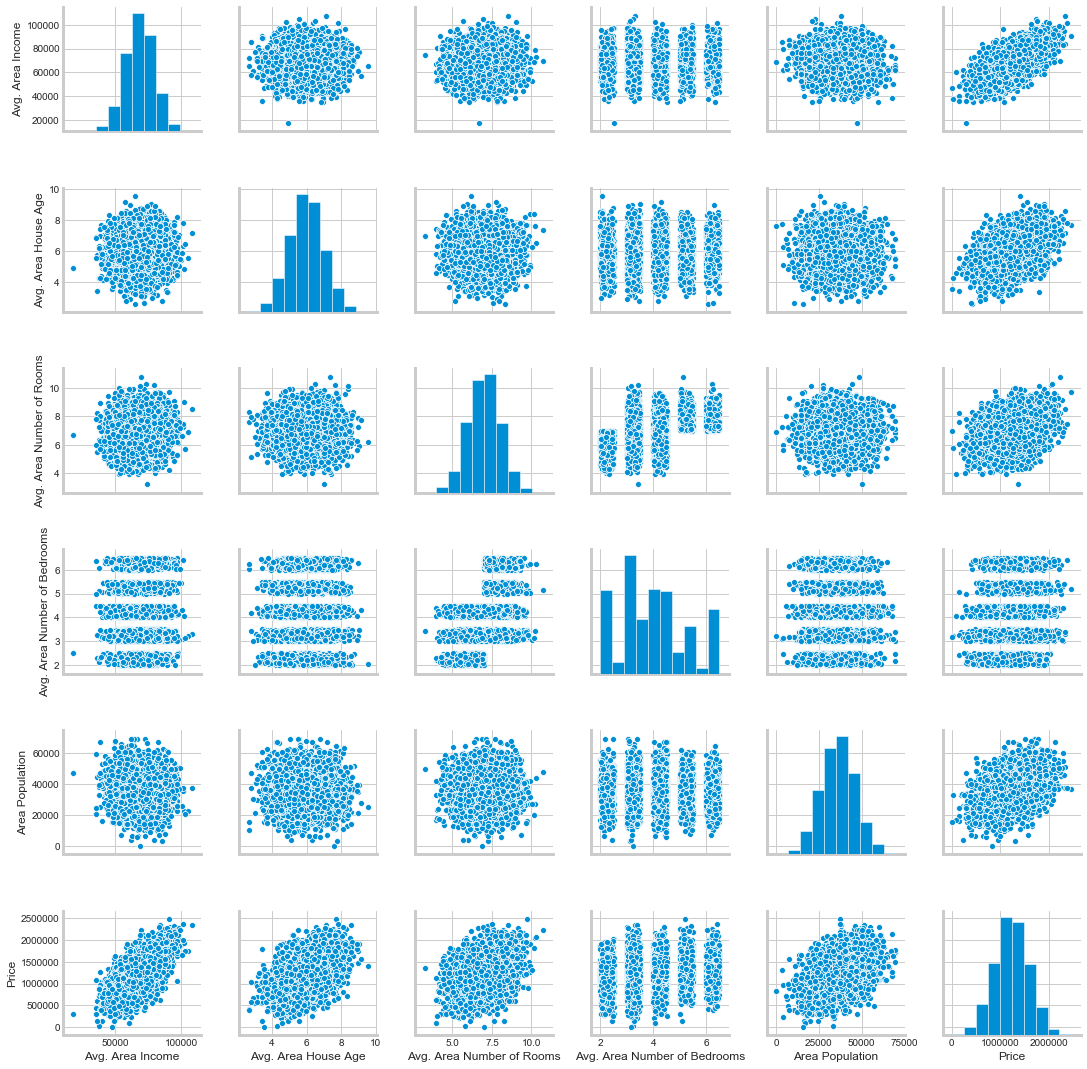

In [80]:
plt.figure(figsize=(12,8),dpi=100)
sns.pairplot(house_data)

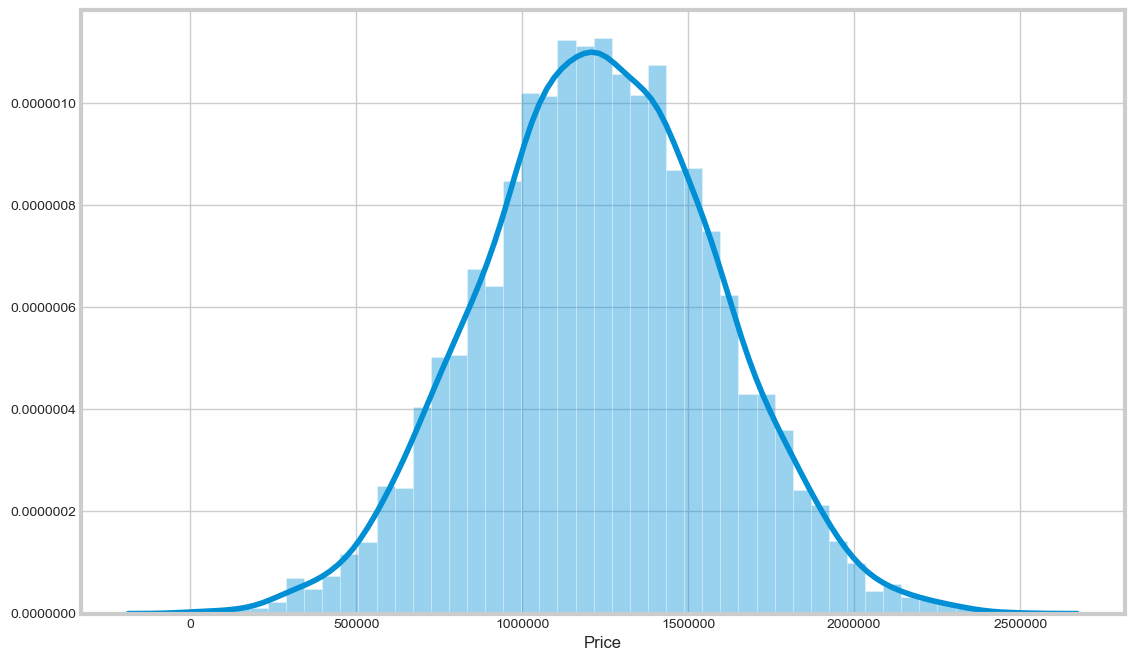

In [81]:
plt.figure(figsize=(12,8),dpi=100)
sns.distplot(house_data['Price'])

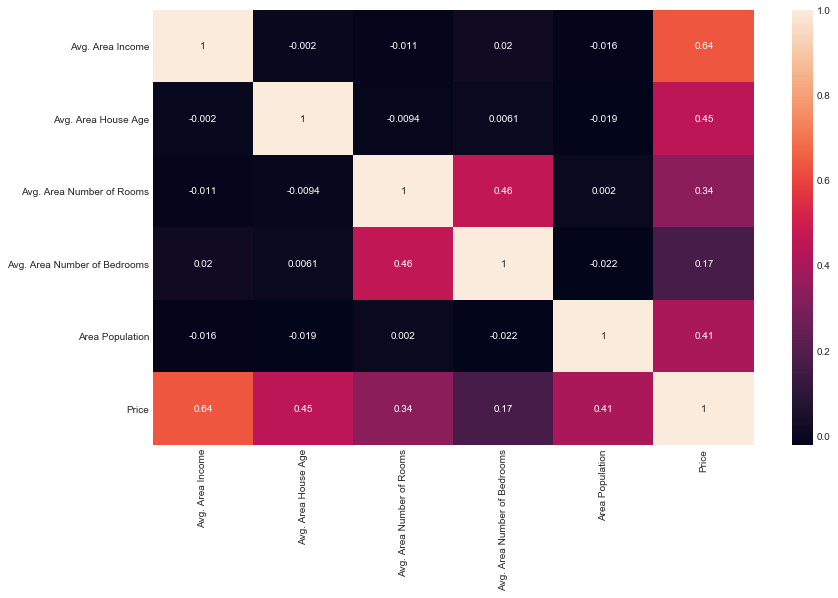

In [82]:
plt.figure(figsize=(12,8))
sns.heatmap(house_data.corr(),annot=True)

## Training a Linear Regression Model

We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable that is the Price column. We will ignore the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [83]:
X = house_data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = house_data['Price']

## Train Test Split

We split the data into a training set and a testing set. We will train the model on the training set and then use the test set to evaluate the model.

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lm = LinearRegression()

In [88]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Model Evaluation

Now, evaluate the model from it's coefficients and we interpret them.

In [89]:
print(lm.intercept_)

-2640159.7968132403


In [90]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678023
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** will result in **increase of \$21.52**.

- A 1 unit increase in **Avg. Area House Age** will result in **increase of \$164883.28**.

- A 1 unit increase in **Avg. Area Number of Rooms** will result in **increase of \$122368.67**.

- A 1 unit increase in **Avg. Area Number of Bedrooms** will result in **increase of \$2233.80**.

- A 1 unit increase in **Area Population** will result in **increase of \$15.15**.



## Predictions from our Model

We make predictions from our test set and see how effective it is.

In [91]:
predictions = lm.predict(X_test)

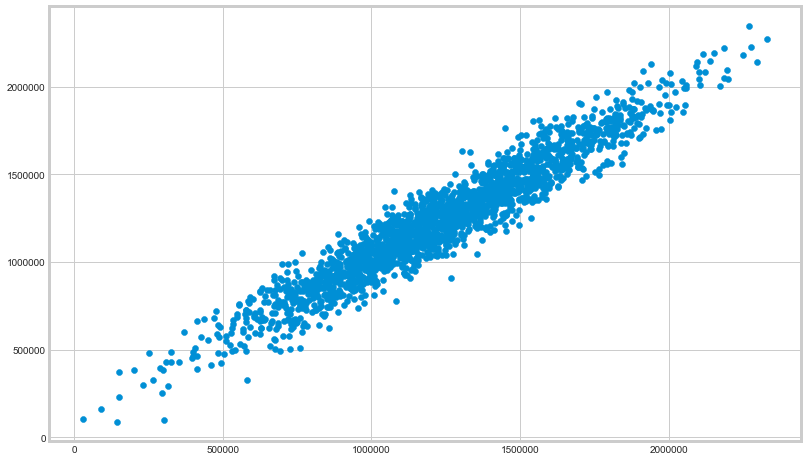

In [92]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions)

**Residual Histogram**

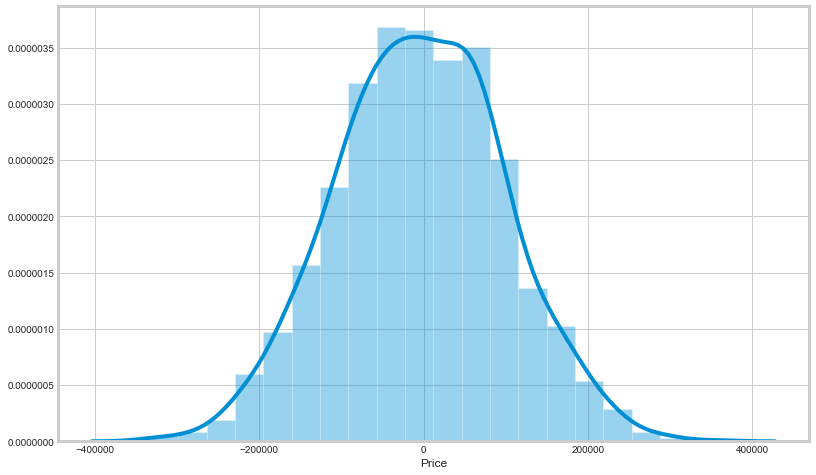

In [93]:
plt.figure(figsize=(12,8))
sns.distplot((y_test-predictions),bins=20)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:
 - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors.
 - **Mean Squared Error** (MSE) is the mean of the squared errors.
 - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors,

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [94]:
from sklearn import metrics

In [95]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22250721783
MSE: 10460958905.775043
RMSE: 102278.82921589904
